In [33]:
sys.path.append('..')
from utils.planar_utils import load_planar_dataset
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import joblib
import random


# TRAIN A 1-HIDDEN-LAYER NEURAL NETWORK

## helper functions

In [34]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

## load data

In [35]:
## CATVSNONCAT DATASET ##
###########################
def load_data():
    """
    Load the train and test set.

    Returns:
        - (X_train, Y_train, X_test, Y_test)
    """

    path = Path('../../data/catvnoncat/data.pkl')
    with open(path, "rb") as f:
        data = joblib.load(f)

    X_train = data["train_set_x"]
    Y_train = data["train_set_y"]
    X_test = data["test_set_x"]
    Y_test = data["test_set_y"]

    return X_train, Y_train, X_test, Y_test
############################
############################

In [36]:
# ## FLOWER DATASET ## 
# ####################

# def load_data():
#     """
#     Load the train and test set.

#     Returns:
#         - (X_train, Y_train, X_test, Y_test)
#     """

#     X, Y = load_planar_dataset()

#     ## train / test split
#     m = X.shape[1]
#     pct_test = 0.20
#     m_test = int(m * pct_test)
#     idx_test = np.random.choice(m, size=m_test, replace=False)
#     idx_train = [i for i in range(m) if i not in idx_test]
#     X_train = X[:, idx_train]
#     Y_train = Y[:, idx_train]
#     X_test = X[:, idx_test]
#     Y_test = Y[:, idx_test]

#     return X_train, Y_train, X_test, Y_test

# ####################
# ####################

In [37]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig = load_data()

print(f"X_train_orig shape: {X_train_orig.shape}")
print(f"Y_train_orig shape: {Y_train_orig.shape}")
print(f"X_test_orig shape: {X_test_orig.shape}")
print(f"Y_test_orig shape: {Y_test_orig.shape}")

X_train_orig shape: (209, 64, 64, 3)
Y_train_orig shape: (209,)
X_test_orig shape: (50, 64, 64, 3)
Y_test_orig shape: (50,)


## visualize data

In [38]:
## CATVSNONCAT DATASET ##
#########################
def visualize_data(X, Y):
    """
    Displays a random image with its label
    """
    m = X.shape[0]
    i = random.randint(0, m-1)
    x = X[i]
    y = Y[i]
    labels = {0: "non-cat", 1: "cat"}
    print(f'label: {labels[y]}')
    plt.imshow(x)
####################
####################

In [39]:
# ## FLOWER DATASET ##
# ####################
# def visualize_data(X, Y):
#     """
#     Displays a random image with its label
#     """
#     plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.cividis)
# ####################
# ####################

label: cat


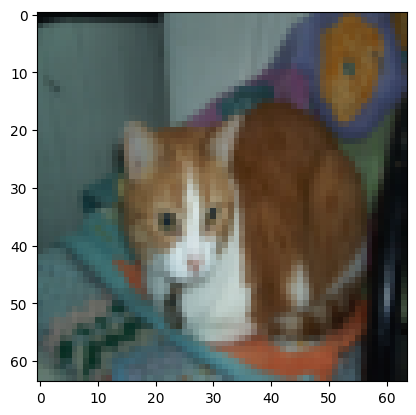

In [59]:
visualize_data(X_train_orig, Y_train_orig)

## preprocess data

In [60]:
## CATVSNONCAT DATASET ##
#########################
def preprocess_data(X, Y = None):
    """Preprocess input data, in order to be fed as the input of the neural network.
    
    Operations:
        - Reshaping of the arrays to fit the Neural Network Input
        - Normalization
    Returns:
        (X_pp, Y_pp)
        
        using the following notations:
        - n_x: number of features in the input of the neural network
        - m: number of observations 
        X_pp: normalized matrix of size (n_x, m)
        Y_pp: normalized array of size (1, m)
    """
    m = X.shape[0]

    ## reshaping
    X = X.reshape(m, -1).T
    if Y is not None:
        Y = Y.reshape(m, 1).T
    
    ## normalization
    X = X / 255.
    
    return X,Y
####################
####################

In [61]:
# ## FLOWER DATASET ## 
# ####################

# def preprocess_data(X, Y = None):
#     """Preprocess input data, in order to be fed as the input of the neural network.
#     """
#     # nothing to do, the data is already in the right shape and scale !
#     return X, Y

# ###################
# ###################

In [63]:
X_train, Y_train = preprocess_data(X_train_orig, Y_train_orig)
X_test, Y_test = preprocess_data(X_test_orig, Y_test_orig)

print(f"X_train shape: {X_train.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_test shape: {Y_test.shape}")

X_train shape: (12288, 209)
Y_train shape: (1, 209)
X_test shape: (12288, 50)
Y_test shape: (1, 50)


## define the network structure

We want to build a 1 hidden layer neural network:

![](../../schemas/1HL-NN.png)

In [108]:
def get_layer_sizes(X, n_h = 5):
    """
    Returns the size of each neural network layer.
    
    (n_x, n_h, n_y)
    """
    n_x = X.shape[0]
    n_h = n_h
    n_y = 1
    return (n_x, n_h, n_y)

In [129]:
n_x, n_h, n_y = get_layer_sizes(X_train, n_h = 3)
print(f"n_x: {n_x}")
print(f"n_h: {n_h}")
print(f"n_y: {n_y}")

n_x: 12288
n_h: 3
n_y: 1


## initialize the parameters

In [130]:
def initialize_params(n_x, n_h, n_y):

    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))

    params = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2
    }
    return params

In [131]:
params = initialize_params(n_x,n_h,n_y)

In [132]:
print(f"shape of W1: {params['W1'].shape}")
print(f"shape of b1: {params['b1'].shape}")
print(f"shape of W2: {params['W2'].shape}")
print(f"shape of b2: {params['b2'].shape}")

shape of W1: (3, 12288)
shape of b1: (3, 1)
shape of W2: (1, 3)
shape of b2: (1, 1)


## forward propagate

In [133]:
def forward_propagate(params, X):

    W1 = params["W1"]
    W2 = params["W2"]
    b1 = params["b1"]
    b2 = params["b2"]

    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    cache = {
        "Z1": Z1,
        "A1": A1,
        "Z2": Z2,
        "A2": A2
    }
    return A2, cache

In [134]:
A2, cache = forward_propagate(params, X_train)

## compute the cost

In [135]:
def compute_cost(A2, Y):
    m = A2.shape[1]
    cost = -(1/m)*np.sum(Y*np.log(A2) + (1-Y)*np.log(1-A2))
    return cost

In [136]:
compute_cost(A2, Y_train)

0.6928412279814291

## backward propagate

In [137]:
def backward_propagate(X, Y, cache, params):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    params -- python dictionary containing our parameters 
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    W2 = params["W2"]

        
    # Retrieve also A1 and A2 from dictionary "cache".
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2,A1.T)
    db2 = (1/m) *(np.sum(dZ2,axis=1,keepdims=True))
    dZ1 = np.dot(W2.T,dZ2) * (1 - np.power(A1,2))
    dW1 = (1/m) *(np.dot(dZ1,X.T))
    db1 = (1/m) *(np.sum(dZ1, axis=1, keepdims=True))
    ### END CODE HERE ###
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [138]:
grads = backward_propagate(X_train, Y_train, cache, params)

## update the parameters

In [139]:
def update_params(params, grads, learning_rate):

    # Retrieve each parameter from the dictionary "parameters"
    W1 = params["W1"]
    b1 = params["b1"]
    W2 = params["W2"]
    b2 = params["b2"]
    
    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    # Update rule for each parameter
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    params = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return params

In [140]:
params = update_params(params, grads, 0.01)

In [141]:
params

{'W1': array([[ 0.0027436 , -0.00136008, -0.01323806, ...,  0.01213228,
          0.00927236, -0.00156149],
        [ 0.00819919,  0.01046476, -0.01390652, ..., -0.00942523,
          0.00545879, -0.01234767],
        [-0.016139  ,  0.00065638,  0.01077577, ...,  0.00336538,
         -0.00036839,  0.01262294]]),
 'b1': array([[ 1.17984358e-06],
        [-2.99217326e-05],
        [ 8.12307841e-06]]),
 'W2': array([[-0.00217041,  0.02029927, -0.00729133]]),
 'b2': array([[-0.00154939]])}

## train

In [142]:
def train(X, Y, nb_iterations, learning_rate):

    m = X.shape[1]
    n_x, n_h, n_y = get_layer_sizes(X)
    params = initialize_params(n_x, n_h, n_y)

    costs = list()

    for i in range(nb_iterations):
        A2, cache = forward_propagate(params, X)
        cost = compute_cost(A2, Y)
        grads = backward_propagate(X, Y, cache, params)
        params = update_params(params, grads, learning_rate)

        if (i % 100) == 0:# we store the cost each 100 iterations
            costs.append(cost)
    
    return params, costs

In [145]:
nb_it = 1500
learning_rate = 0.01
params, costs = train(X_train, Y_train, nb_it, learning_rate)

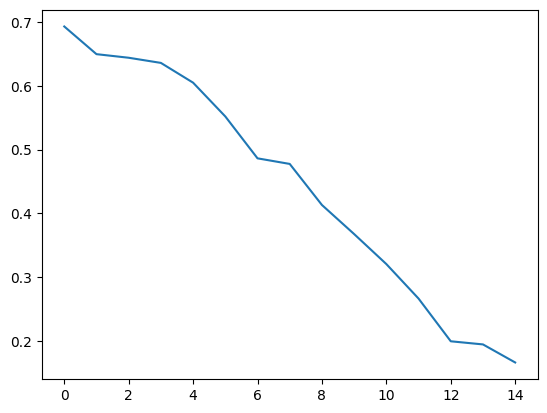

In [146]:
plt.plot(costs)

## predict

In [147]:
def predict(params, X, threshold = 0.5):
    A2, _= forward_propagate(params, X)
    Yp = 1*(A2 >= threshold)
    return Yp

In [148]:
predict(params, X_train)

array([[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
        1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
        0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]])

## evaluate the performance

In [149]:
def evaluate_performance(X_train, Y_train, X_test, Y_test, params, print_perf=True):
    Yp_train = predict(params, X_train)
    Yp_test = predict(params, X_test)
    
    acc_train = np.mean(Yp_train == Y_train)
    acc_test = np.mean(Yp_test == Y_test)

    if print_perf:
        print(f'train accuracy: {acc_train:.1%}')
        print(f'test accuracy: {acc_test:.1%}')
        print("")
        
        acc_bs_one = (Y_test == 1).mean()
        acc_bs_zero = (Y_test == 0).mean()
        print('baseline:')
        print(f'test accuracy, model always predicts "1": {acc_bs_one:.1%}')
        print(f'test accuracy, model always predicts "0": {acc_bs_zero:.1%}')
    return acc_train, acc_test

In [150]:
evaluate_performance(X_train, Y_train, X_test, Y_test, params)

train accuracy: 97.6%
test accuracy: 74.0%

baseline:
test accuracy, model always predicts "1": 66.0%
test accuracy, model always predicts "0": 34.0%


(0.9760765550239234, 0.74)

# EXPERIMENTS

In [ ]:
def experiment_with_learning_rate(X_train, Y_train, X_test, Y_test, learning_rates, nb_iterations=2000):
    res_cost = dict()
    res_acc = dict() 

    for lr in learning_rates:
        params, costs = train(X_train, Y_train, nb_iterations, lr)
        acc_train, acc_test = evaluate_performance(X_train, Y_train, X_test, Y_test, params, print_perf=False)

        res_cost[lr] = costs
        res_acc[lr] = (acc_train, acc_test)
        
        plt.plot(res_cost[lr], label= lr)
    
    ## display the evolution of the cost
    plt.xlabel = "iteration ( % 100)"
    plt.ylabel = "cost"
    plt.legend(loc='upper center', shadow=True)
    plt.show()

    ## display the accuracy
    for lr in learning_rates:
        print(f'LR = {lr} / train accuracy = {res_acc[lr][0]:.1%}, test accuracy = {res_acc[lr][1]:.1%}')


In [ ]:
learning_rates = [10**-4, 10**-3, 10**-2, 10**-1]
nb_iterations = 10000
experiment_with_learning_rate(X_train, Y_train, X_test, Y_test, learning_rates, nb_iterations)